# **Flipkart Sentiment Prediction**


# **Sentiment Analysis of Real-time Flipkart Product Reviews**
Objective

    The objective of this project is to classify customer reviews as positive or negative and understand the pain points of customers who write negative reviews. By analyzing the sentiment of reviews, we aim to gain insights into product features that contribute to customer satisfaction or dissatisfaction.
    Dataset

    A team of Data Engineers have already scraped real-time data from Flipkart website. They followed the instructions given in this documentation for extracting user reviews. Don’t scrape your own data. Use the dataset given below to solve the problem statement. Click Here to download the data.

    The dataset consists of 8,518 reviews for the "YONEX MAVIS 350 Nylon Shuttle" product from Flipkart. Each review includes features such as Reviewer Name, Rating, Review Title, Review Text, Place of Review, Date of Review, Up Votes, and Down Votes.
    Data Preprocessing

    Text Cleaning: Remove special characters, punctuation, and stopwords from the review text.
    Text Normalization: Perform lemmatization or stemming to reduce words to their base forms.
    Numerical Feature Extraction: Apply techniques like Bag-of-Words (BoW), Term Frequency-Inverse Document Frequency (TF-IDF), Word2Vec (W2V), and BERT models for feature extraction.

Modeling Approach

    Model Selection: Train and evaluate various machine learning and deep learning models using the embedded text data.
    Evaluation Metric: Use the F1-Score as the evaluation metric to assess the performance of the models in classifying sentiment.

Model Deployment

    Flask or Streamlit App Development: Develop a Flask or Streamlit web application that takes user input in the form of a review and generates the sentiment (positive or negative) of the review.
    Model Integration: Integrate the trained sentiment classification model into the Flask or Streamlit app for real-time inference.
    Deployment: Deploy the Flask or Streamlit app on an AWS EC2 instance to make it accessible over the internet.

Workflow

    Data Loading and Analysis: Gain insights into product features that contribute to customer satisfaction or dissatisfaction.
    Data Cleaning: Preprocess the review text by removing noise and normalizing the text.
    Text Embedding: Experiment with different text embedding techniques to represent the review text as numerical vectors.
    Model Training: Train machine learning and deep learning models on the embedded text data to classify sentiment.
    Model Evaluation: Evaluate the performance of the trained models using the F1-Score metric.
    Flask or Streamlit App Development: Develop a Flask or Streamlit web application for sentiment analysis of user-provided reviews.
    Model Deployment: Deploy the trained sentiment classification model along with the Flask or Streamlit app on an AWS EC2 instance.
    Testing and Monitoring: Test the deployed application and monitor its performance for any issues or errors.

1.Data Loading and Analysis

In [1]:
!pip install demoji

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import demoji
import time
import joblib
import os
from nltk.tokenize import word_tokenize
from imblearn.over_sampling import SMOTE

In [3]:
df=pd.read_csv(r"C:\Users\bajay\Downloads\reviews_badminton\data.csv")

In [4]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [5]:
df=df.dropna()

In [6]:
df.shape

(8013, 8)

In [7]:
df.describe()

,Up Votes,Down Votes,Ratings
count,8013.000000,8013.000000,8013.000000
mean,0.386747,0.123424,4.198178
std,11.849649,3.334320,1.244423
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,0.000000,0.000000,5.000000
max,889.000000,219.000000,5.000000


In [8]:
df.isnull().sum()

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        0
Ratings            0
dtype: int64

In [9]:
df.columns=[col.lower().replace(" ","_") for col in df.columns]

In [10]:
positive_threshold = 3.5
# negative_threshold = 3.5
#infer sentiment based on rating
def infer_sentiment(rating):
  if rating >= positive_threshold:
    return 1  #positive Sentiment
  else:
    return 0 # Neural Rating or other

df['sentiment'] = df['ratings'].apply(infer_sentiment)

C:\Users\bajay\AppData\Local\Temp\ipykernel_2000\1543073362.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['ratings'].apply(infer_sentiment)


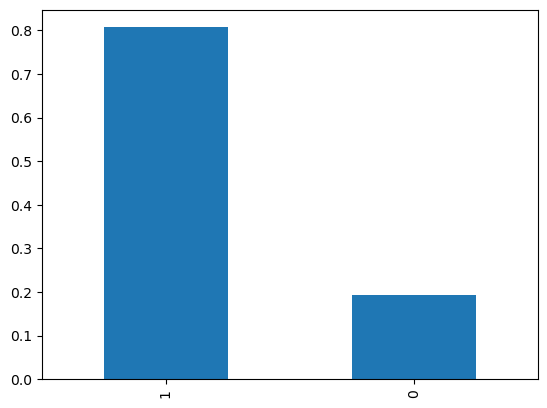

In [11]:
df['sentiment'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [12]:
df.head()

,reviewer_name,review_title,place_of_review,up_votes,down_votes,month,review_text,ratings,sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,1
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,0
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5,1
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5,1


In [13]:
X=df['review_text']
y=df['sentiment']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(6009,) (6009,)
(2004,) (2004,)


In [15]:
df['sentiment'].value_counts()

1    6462
0    1551
Name: sentiment, dtype: int64

In [16]:
demoji.download_codes()

C:\Users\bajay\AppData\Local\Temp\ipykernel_2000\2299328559.py:1: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [17]:
from wordcloud import WordCloud

def display_wordcloud(data):
  wc = WordCloud(background_color='black',
                 width=1600,
                 height=800).generate(' '.join(data))
  plt.figure(1,figsize=(30,20))
  plt.imshow(wc)
  plt.axis('off')
  plt.show()

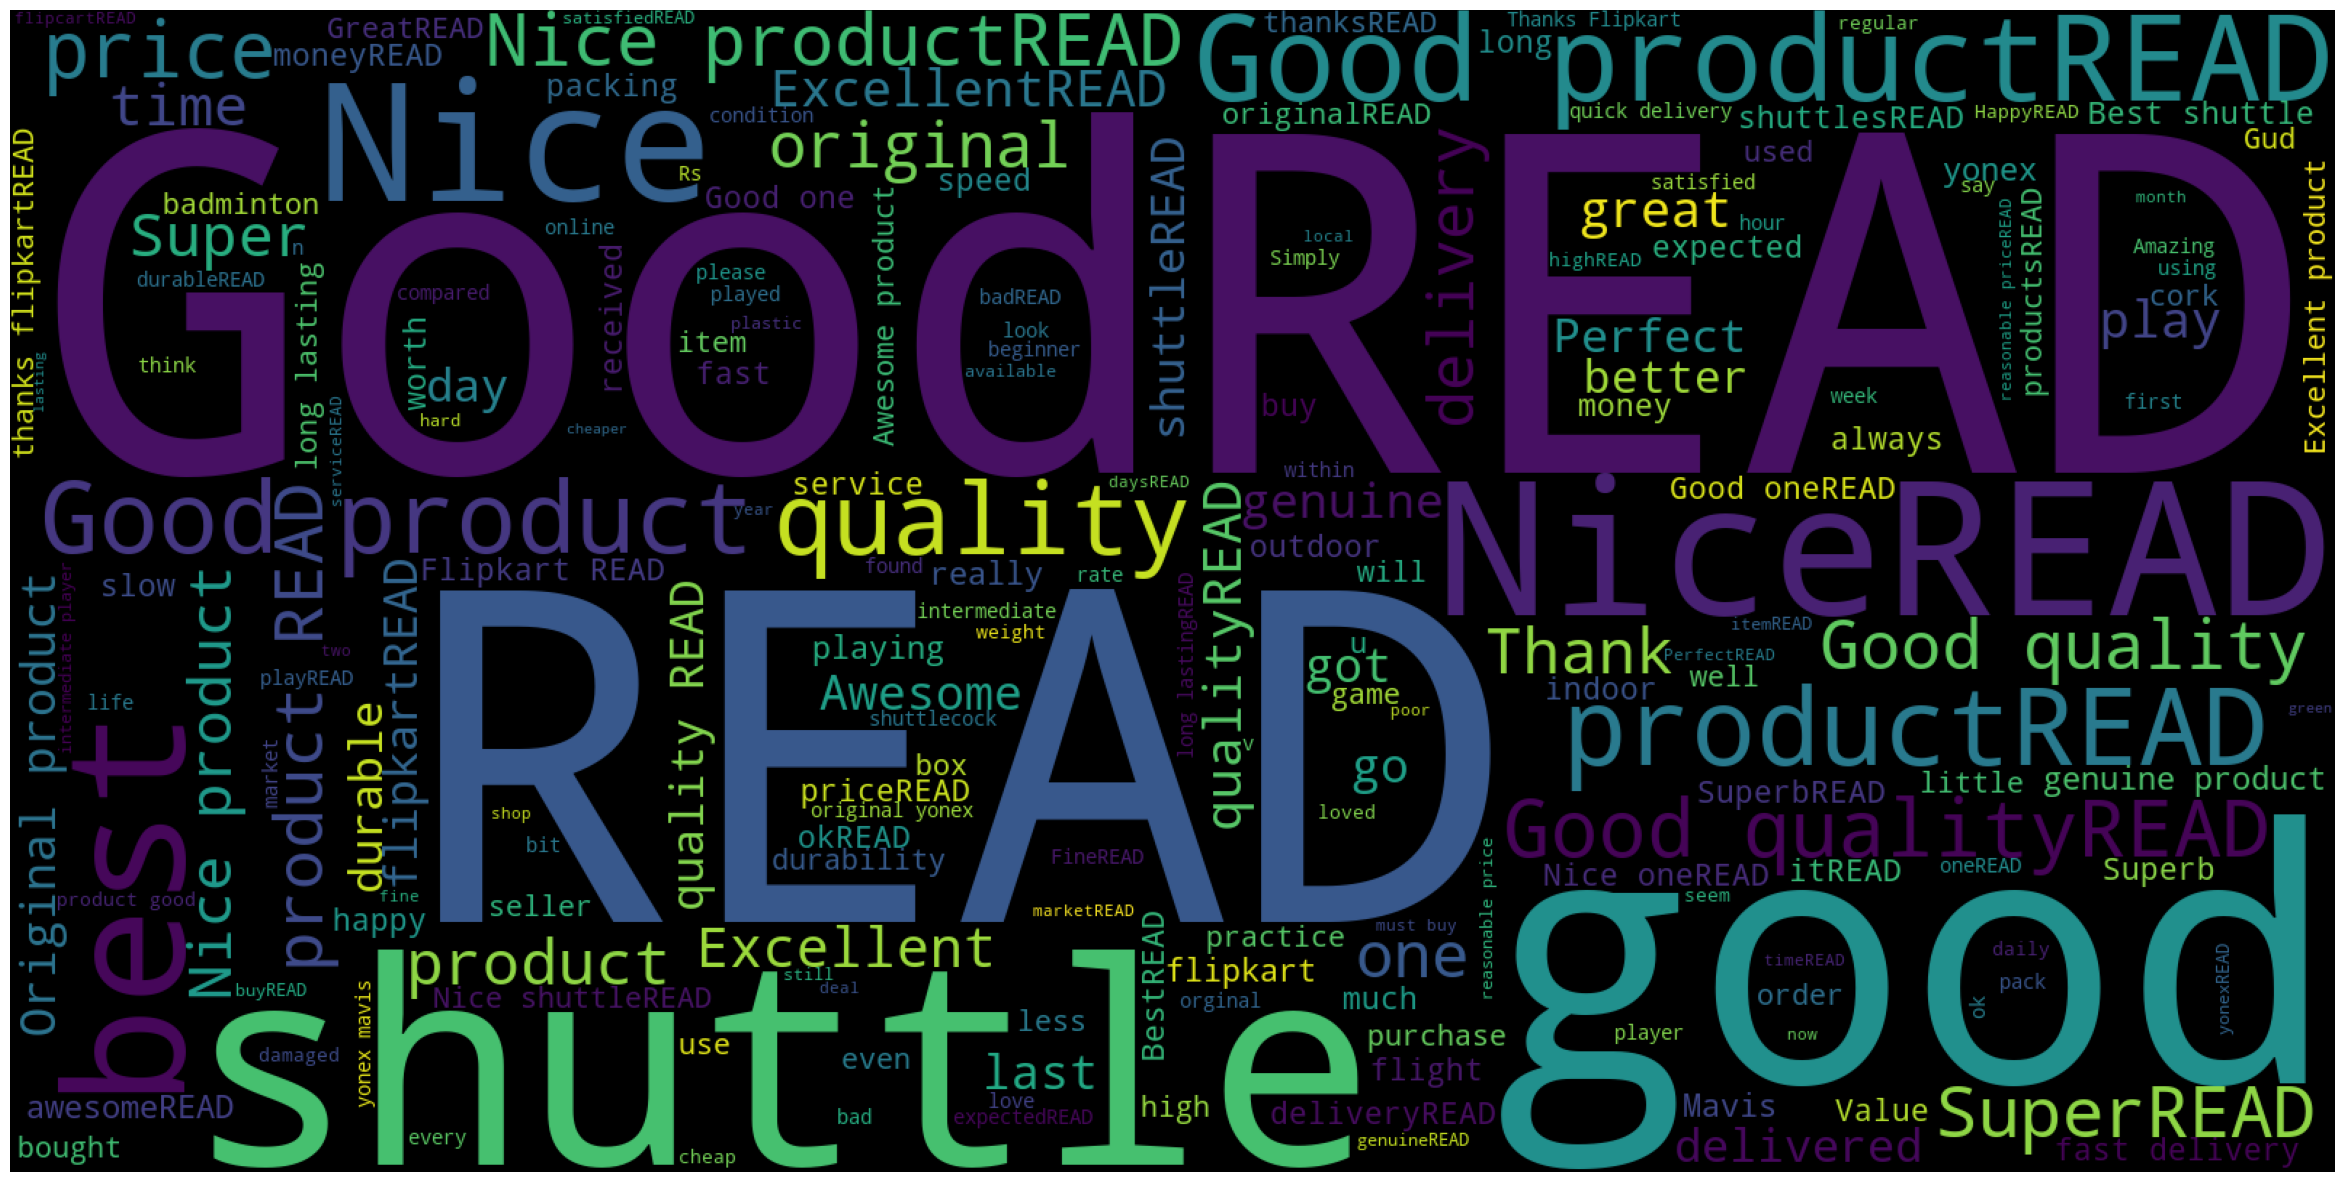

In [18]:
# Display the wordcloud for positive Sentiment
display_wordcloud(X_train[y_train==1])

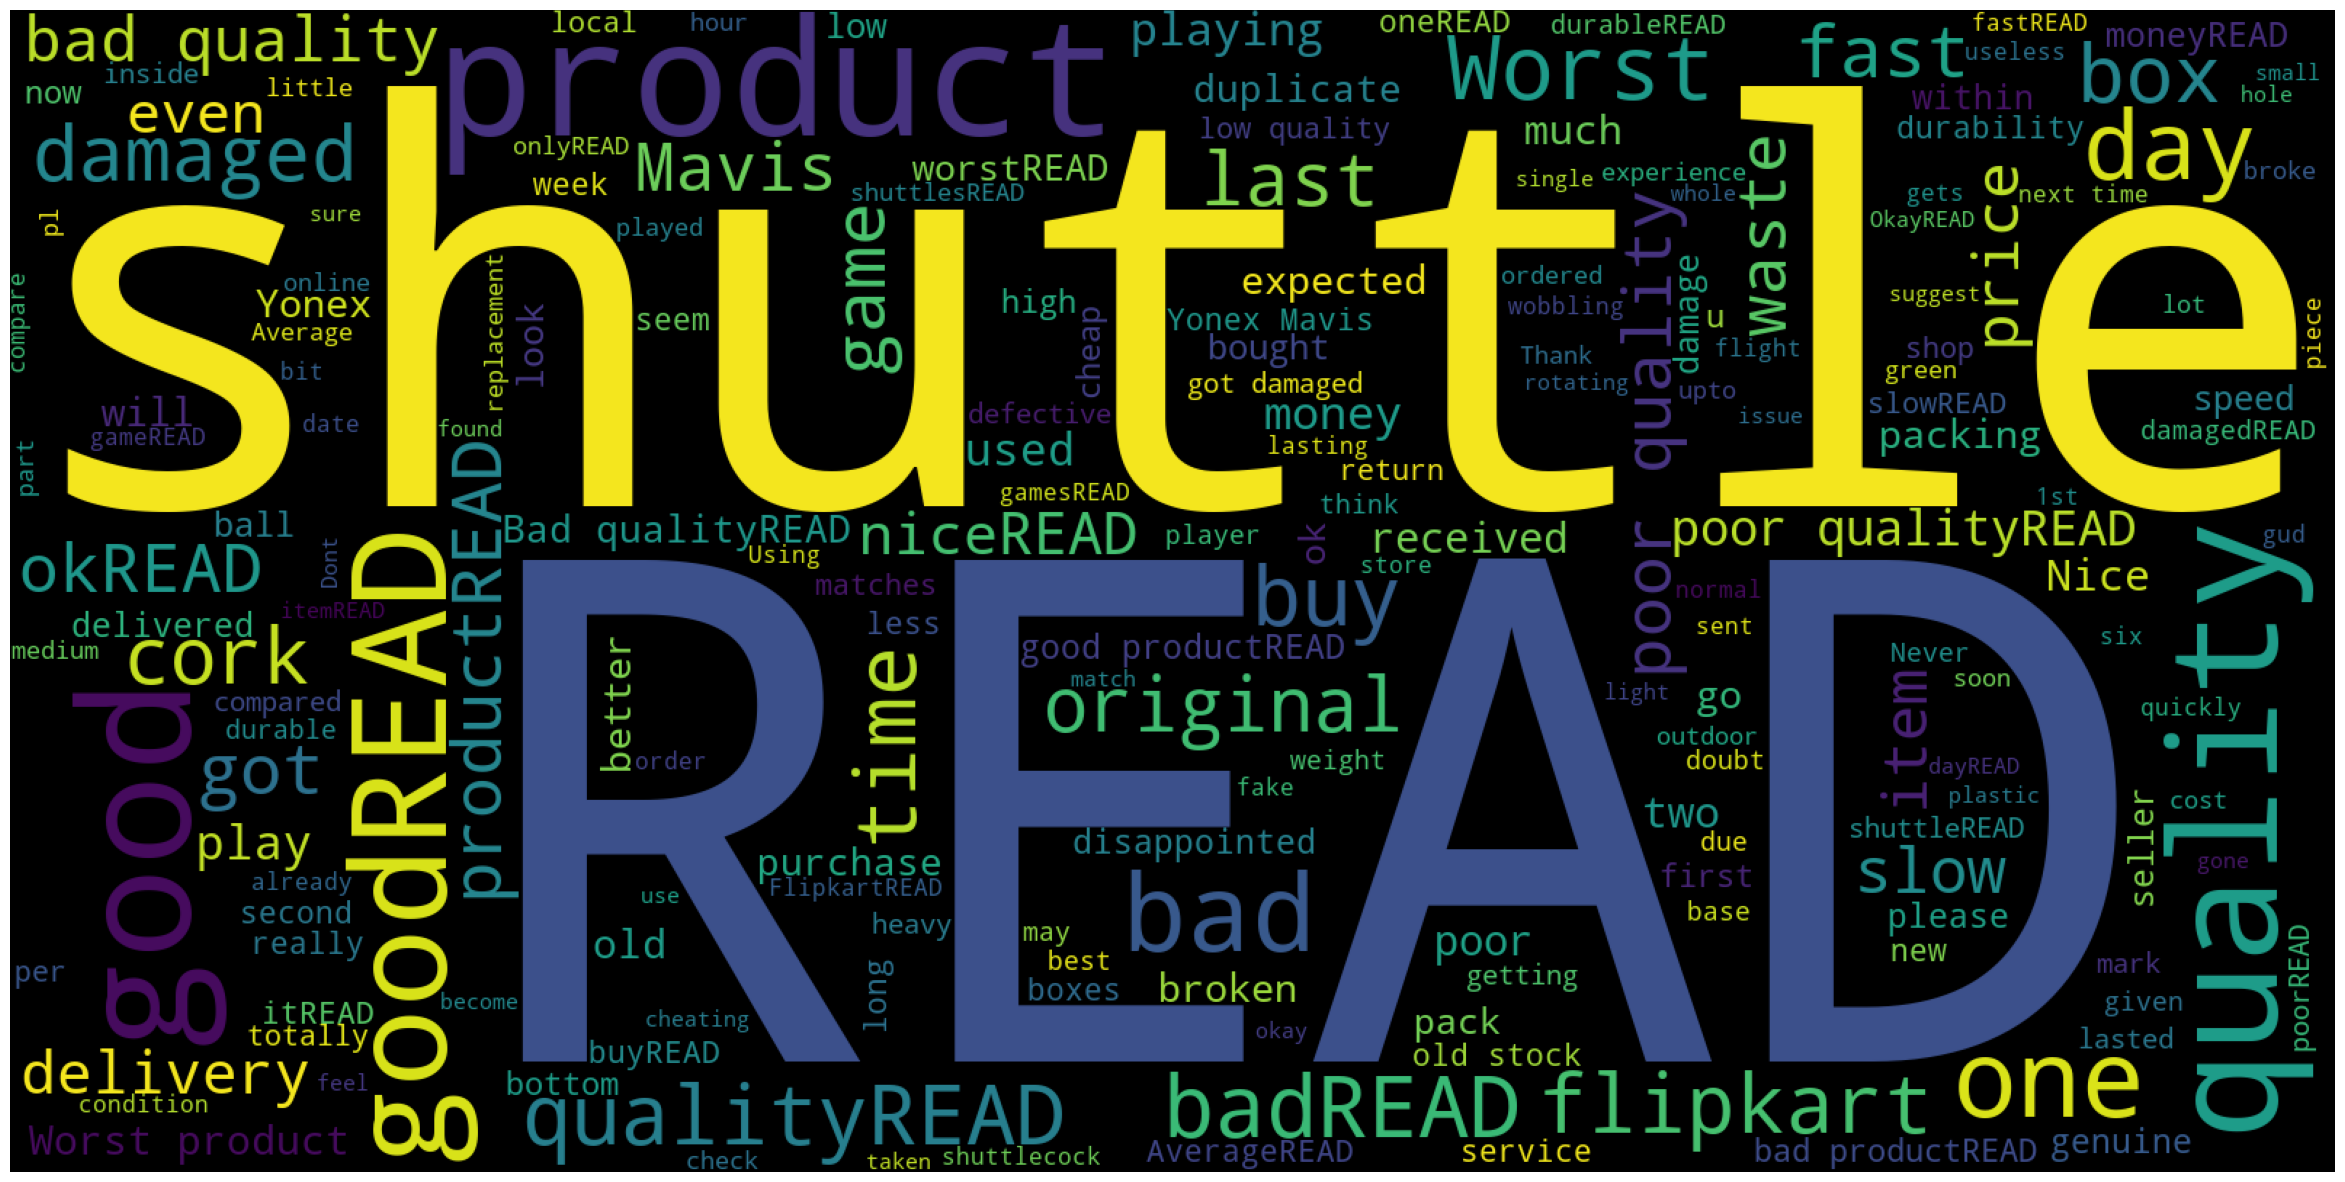

In [19]:
# Display the wordcloud for Negative Sentiment
display_wordcloud(X_train[y_train==0])

## Data Preprocessing on train data

In [20]:
# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
demoji.download_codes()

lemmatizer = WordNetLemmatizer()

def clean(doc):
    doc = doc.lower()  # Convert all text to lowercase

    doc = doc.replace("READ", " ")
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Remove emojis
    doc = demoji.replace(doc, "")

    # Tokenization
    tokens = word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in lemmatized_tokens if word.lower() not in stop_words]

    return " ".join(filtered_tokens)

# Assuming X_train is your dataset containing text data
X_train_clean = X_train.apply(clean)
X_test_clean = X_test.apply(clean)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bajay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bajay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bajay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\bajay\AppData\Local\Temp\ipykernel_2000\3681598912.py:5: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [21]:
X_train_clean.head()

4512                                     good qualityread
5789                                         superiorread
2919                                            superread
7291    love flipkart wonderful offer delivery wa grea...
5727                 good product delivered fast goodread
Name: review_text, dtype: object

In [22]:
y_train

4512    1
5789    1
2919    1
7291    1
5727    1
       ..
5391    1
3724    1
2113    1
3067    1
3192    0
Name: sentiment, Length: 6009, dtype: int64

In [23]:
# pip install mlflow

In [24]:
import mlflow
mlflow.set_experiment('Sentiment Prediction')

<Experiment: artifact_location='file:///C:/Users/bajay/OneDrive/Desktop/Internship_2024/backend_sessions/ML_FLOW_2/mlruns/204047676285042813', creation_time=1714127570578, experiment_id='204047676285042813', last_update_time=1714127570578, lifecycle_stage='active', name='Sentiment Prediction', tags={}>

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import mlflow
import mlflow.sklearn
import time

# Define pipeline correctly
pipe1 = Pipeline([
    ("vectorization", CountVectorizer()),
    ("classifier", MultinomialNB())
])

parameter_grid_1 = [
    {
        'vectorization': [CountVectorizer()],
        'vectorization__max_features': [100, 150],
        'classifier__alpha': [10, 20]
    }
]

clf = GridSearchCV(
    estimator=pipe1,
    param_grid=parameter_grid_1,
    scoring='accuracy',
    return_train_score=True,
    verbose=1
)

# Start MLflow run
with mlflow.start_run() as run:
    start_time = time.time()
    clf.fit(X_train_clean, y_train)
    end_time = time.time()
    
    # Log parameters, metrics, and model
    mlflow.log_params(clf.best_params_)
    mlflow.log_metric("mean_accuracy", clf.best_score_)
    mlflow.sklearn.log_model(clf.best_estimator_, "model")
    
    # Log elapsed time
    mlflow.log_metric("training_time", end_time - start_time)


2024/04/26 16:23:55 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\bajay\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


# Sentiment Analysis pipeline

### Define parameter grid for each algorithm


In [26]:
pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ]),
    
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ]),
    
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ]),

    'random_forest': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', RandomForestClassifier())
    ])
}

param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features': [1000, 2000],
            'classifier__alpha': [1, 10, 20]
        }
    ],
    
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features': [500, 1000, 2000],
            'classifier__max_depth': [None, 5, 10, 20, 50],
        }
    ],
    
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features': [1000, 2000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ],

    'random_forest': [
        {
            'vectorization__max_features': [1000, 2000],
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 10, 20, 50],
        }
    ]
}


### Perform GridSearchCV for each algorithm

In [27]:
import mlflow
mlflow.set_experiment('Sentiment prediction')

<Experiment: artifact_location='file:///C:/Users/bajay/OneDrive/Desktop/Internship_2024/backend_sessions/ML_FLOW_2/mlruns/654896604443250075', creation_time=1714127614054, experiment_id='654896604443250075', last_update_time=1714127614054, lifecycle_stage='active', name='Sentiment prediction', tags={}>

In [28]:
import os
import time
import joblib
from sklearn.model_selection import GridSearchCV
import mlflow
import mlflow.sklearn

# Define developer name
dev = 'Tharun kumar'

# Dictionary to store best models
best_models = {}

# Run the Pipeline
for algo in pipelines.keys():
    print("*" * 10, algo, "*" * 10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1)

    # Fit   
    start_fit_time = time.time()
    grid_search.fit(X_train_clean, y_train)
    end_fit_time = time.time()

    # predict
    start_predict_time = time.time()
    y_pred = grid_search.predict(X_test_clean)
    end_predict_time = time.time()

    # Ensure 'best_models' directory exists
    if not os.path.exists('best_models'):
        os.makedirs('best_models')

    # Saving the best model
    joblib.dump(grid_search.best_estimator_, f'best_models/{algo}.pkl')
    model_size = os.path.getsize(f'best_models/{algo}.pkl')

    # Print log
    print("Train Score: ", grid_search.best_score_)
    print("Test Score:", grid_search.score(X_test_clean, y_test))
    print('Fit Time:', end_fit_time - start_fit_time)
    print('Predict Time:', end_predict_time - start_predict_time)
    print("Model size:", model_size)
    print("." * 15)
    
    # End the active MLflow run if there is any
    with mlflow.start_run() as run:
        mlflow.set_tag("developer", dev)
        
        # Log parameters with mlflow.log_param()
        mlflow.log_param('algorithm', algo)
        mlflow.log_param('hyperparameter_grid', param_grids[algo])
        mlflow.log_param('best_hyperparameter', grid_search.best_params_)
        
        # Log metrics with mlflow.log_metrics()
        mlflow.log_metric('train_score', grid_search.best_score_)
        mlflow.log_metric('test_score', grid_search.score(X_test_clean, y_test))
        mlflow.log_metric('fit_time', end_fit_time - start_fit_time)
        mlflow.log_metric('predict_time', end_predict_time - start_predict_time)
        mlflow.log_metric('model_size', model_size)
        
        # Log model using mlflow.sklearn.log_model()
        mlflow.sklearn.log_model(grid_search.best_estimator_, f'{algo}_model')


********** naive_bayes **********
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Train Score:  0.8766858178362181
Test Score: 0.876746506986028
Fit Time: 12.101257562637329
Predict Time: 0.02792668342590332
Model size: 85770
...............
********** decision_tree **********
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Train Score:  0.8695303830280091
Test Score: 0.8687624750499002
Fit Time: 63.4660267829895
Predict Time: 0.05694890022277832
Model size: 84288
...............
********** logistic_regression **********
Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\bajay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bajay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bajay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bajay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bajay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bajay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\bajay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bajay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bajay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bajay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bajay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bajay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Train Score:  0.8622073119876532
Test Score: 0.8702594810379242
Fit Time: 478.1546025276184
Predict Time: 0.028922557830810547
Model size: 90845
...............
********** random_forest **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Train Score:  0.8740242809306166
Test Score: 0.8682634730538922
Fit Time: 568.0618410110474
Predict Time: 0.3759937286376953
Model size: 34210356
...............


**Naive Bayes:**

  -  Accuracy: Achieves a test accuracy of approximately 87.7%.
  - Efficiency: Has the shortest training time among all models, taking only about 11.19 seconds to train.
  -  Scalability: The model size is relatively small at 85,770 bytes, indicating it's lightweight and efficient in terms of memory usage.
  -  Interpretability: Naive Bayes models are known for their simplicity and interpretability, making it easy to understand how the model makes predictions.
  -  Assumptions: Relies on the assumption of feature independence, which might not hold true in all datasets.

**Decision Tree:**

   - Accuracy: Achieves a test accuracy of around 86.9%.
   - Interpretability: Decision trees are interpretable and can be visualized, making it easy to understand the decision-making process.
   -  Risk of Overfitting: Decision trees have a tendency to overfit the training data, as evidenced by the slightly lower test accuracy compared to the training accuracy.
   -  Scalability: While decision trees are relatively fast to train, the model size can grow significantly with larger datasets and deeper trees.
   - Hyperparameters: Tuning hyperparameters such as maximum depth and minimum samples per leaf can help mitigate overfitting.

**Logistic Regression:**

   - Accuracy: Achieves a test accuracy of approximately 87.0%.
   - Interpretability: Logistic regression coefficients provide insights into the importance of each feature and the direction of their influence on the target variable.
   - Training Time: Logistic regression has the longest training time among all models, taking about 503.25 seconds.
   - Regularization: Regularization techniques such as L1 and L2 regularization can help prevent overfitting in logistic regression models.
   - Scalability: While logistic regression is generally efficient for small to moderate-sized datasets, it may not scale well to very large datasets.

**Random Forest:**

  -  Accuracy: Achieves a test accuracy of around 86.4%.
  -  Ensemble Learning: Random Forest is an ensemble method that combines multiple decision trees to improve performance and reduce overfitting.
  -  Training Time: Random Forest has a longer training time compared to Naive Bayes and Decision Tree, taking approximately 345.37 seconds.
  -  Model Size: Random Forest has the largest model size among all models, indicating higher memory requirements.
  -  Hyperparameters: Tuning hyperparameters such as the number of trees and maximum depth can significantly impact model performance.